In [12]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt

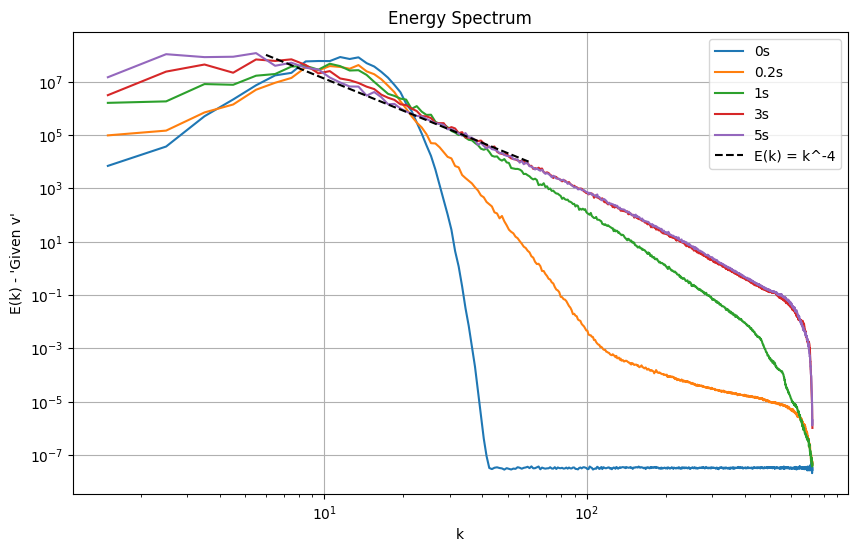

In [47]:
def compute_spectrum(u_data):
    grid_size = 1024
    ux = u_data.reshape((grid_size, grid_size))
    
    ux_fft = np.fft.fft2(ux)
    energy_density = 0.5 * (np.abs(ux_fft)**2)
    
    kx = np.fft.fftfreq(grid_size) * grid_size
    ky = np.fft.fftfreq(grid_size) * grid_size
    k = np.sqrt(kx[:, None]**2 + ky[None, :]**2)
    
    k_bins = np.arange(0.5, k.max(), 1)
    k_spectrum = np.zeros(len(k_bins) - 1)
    
    for i in range(len(k_bins) - 1):
        mask = (k >= k_bins[i]) & (k < k_bins[i+1])
        k_spectrum[i] = energy_density[mask].mean()
    
    return k_bins[:-1], k_spectrum

files = [
    '../proceed_data/proceed_data_v/processed_data/0_ux_data.csv',
    '../proceed_data/proceed_data_v/processed_data/0.2_ux_data.csv',
    '../proceed_data/proceed_data_v/processed_data/1_ux_data.csv',
    '../proceed_data/proceed_data_v/processed_data/3_ux_data.csv',
    '../proceed_data/proceed_data_v/processed_data/5_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/10_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/15_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/20_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/25_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/30_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/35_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/40_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/45_ux_data.csv',
    # '../proceed_data/proceed_data_v/processed_data/50_ux_data.csv'
]
plt.figure(figsize=(10, 6))
for file in files:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")

k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-4) * 10e7
k_a_sh = k_a * 6
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - 'Given v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

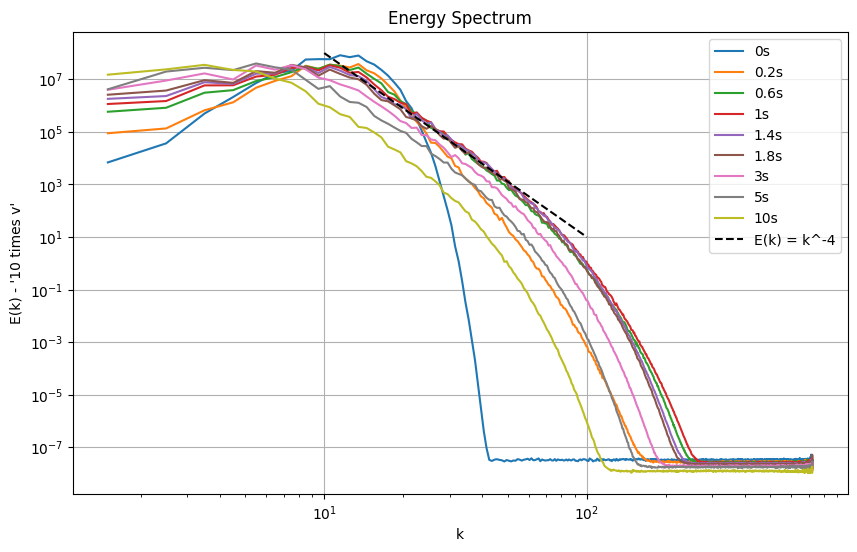

In [46]:
files = [
    '../proceed_data/proceed_data_v_10/processed_data/0_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/0.2_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/0.6_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/1_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/1.4_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/1.8_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/3_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/5_ux_data.csv',
    '../proceed_data/proceed_data_v_10/processed_data/10_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/10_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/15_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/20_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/25_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/30_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/35_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/40_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/45_ux_data.csv',
    # '../proceed_data/proceed_data_v_10/processed_data/50_ux_data.csv'
]

plt.figure(figsize=(10, 6))
for file in files:
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[:1024 * 1024]
    
    k, E_k = compute_spectrum(data)
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k[1:], E_k[1:], label=f"{label}s")
k_a = np.logspace(0, 1, 500)
E_k_a = ((k_a)**-7) * 10e7 #y축 평행 이동
k_a_sh = k_a * 10 #x축 평행 이동
plt.loglog(k_a_sh, E_k_a, linestyle='--', color='black', label="E(k) = k^-4")
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()